# Recap: Maximum Likelihood Estimation

Given a data set $D=\mathbb{[x]}_{t=1}^T$. We want to find the parameters $\theta$ of a given function (probability density function), e.g. the normal distribution ($\theta = (\mu, \Sigma)$), that have the highest probability given the data: $arg \max_{\theta} \ p(\theta \mid D)$. 

Following the Bayes rule,  $p(\theta \mid D)$ is equal to $\frac{p(D \mid \theta) \, p(\theta)}{p(D)}$. However, we are not interested in the whole posterior $p(\theta \mid D)$. Since we assume the prior distribution of the parameters $p(\theta)$ as equally distributed, this factor is constant for every assignent of $\theta$. Also, the factor $p(D)$ does not depend on the parameters and can be treated as constant as well. 

Now, $arg \max_{\theta} \ p(\theta \mid D)$ becomes $arg \max_{\theta} \ p(D \mid \theta)$.


#### Given a 1-dimensional data set:




In [1]:
require(mvtnorm)
library(ellipse)

Lade n"otiges Paket: mvtnorm

Warning message:
"Paket 'mvtnorm' wurde unter R Version 4.3.3 erstellt"

Attache Paket: 'ellipse'


Das folgende Objekt ist maskiert 'package:graphics':

    pairs




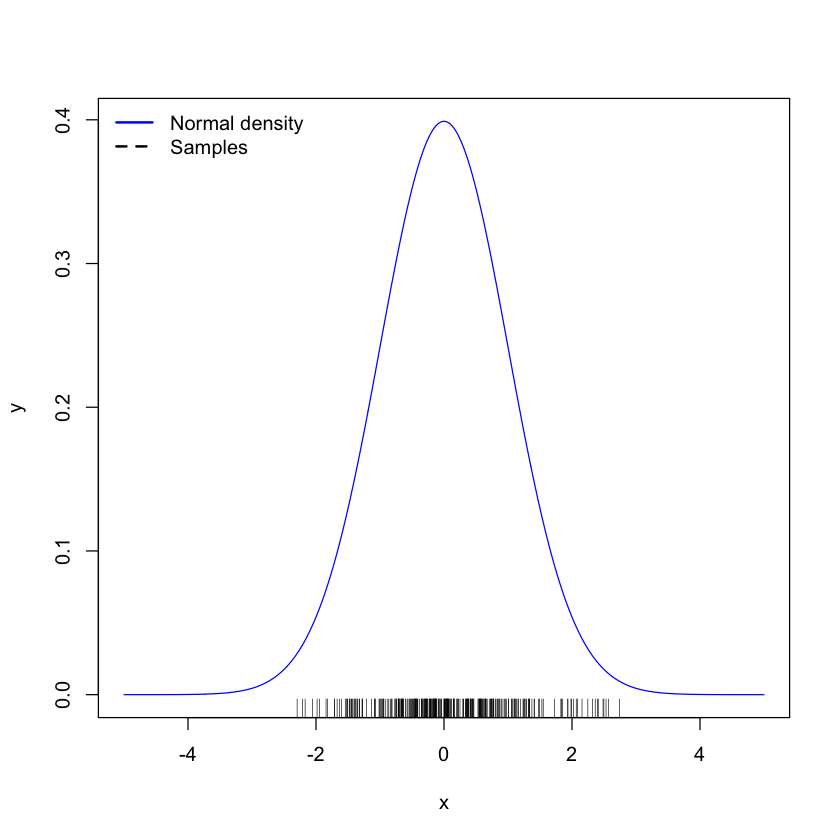

In [2]:
samples <- rnorm(300, 0, 1)
par(bg = 'white')
x <- seq(-5, 5, length=1000)
y <- dnorm(x, mean=0, sd=1)
plot(x, y, type="l", lwd=1, col="blue")
rug(x = samples)
legend("topleft",bty="n",
        lty=c(1,8),
        lwd=c(2,2),
        col=c("blue", "black"),
        legend=c("Normal density", "Samples"))


#### Estimating the best parameters

Given samples, how do we find the parameters $\theta = (\mu, \Sigma)$ that maximizes $p(D \mid \theta)$? 

$p(x_1, \, x_2, \dots, x_T \mid \mu, \Sigma) = \prod_{t=1}^T \mathcal{N}(x_t \mid \mu, \Sigma)$

Now we take the log, since taking the log is a monotonic operation the locations of the maxima do not change.

$log \prod_{t=1}^T \mathcal{N}(x_t \mid \mu, \Sigma) = \sum_{t=1}^T log \mathcal{N}(x_t \mid \mu, \Sigma) = l(\mu, \Sigma; x_{1:T})$

Finding the best $\hat{\mu}, \, \hat{\Sigma}$ by solving $(\frac{\partial}{\partial \mu}, \frac{\partial}{\partial \Sigma}) \, l(\mu, \Sigma; x_{1:T}) = \mathbb{0}$

$\begin{align}
\frac{\partial}{\partial \mu} \sum_{t=1}^T log \mathcal{N}(x_t \mid \mu, \Sigma) &= \mathbb{0} \\ \dots \\ \hat{\mu} &= \frac{1}{T} \sum_{t=1}^{T}x_t \\
\frac{\partial}{\partial \Sigma} \sum_{t=1}^T log \mathcal{N}(x_t \mid \mu, \Sigma) &= \mathbb{0} \\ \dots \\ \hat{\sigma}^2 &= \frac{1}{T} \sum_{t=1}^{T} (x_t - \hat{\mu})^2 \ \ \ \text{(univariate case)}
\end{align}$

#### Task (1)
Implement the estimation of the mean and the variance given the samples using the maximum likelihood estimator. 



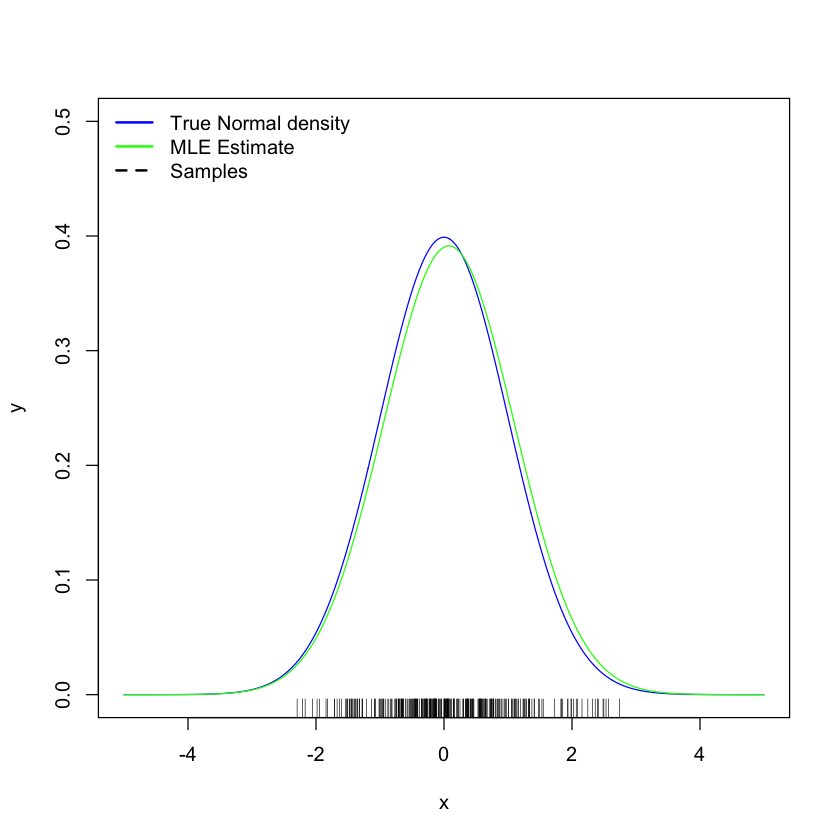

In [3]:
mu <-  # todo
sig <-  # todo

par(bg = 'white')
plot(x, y, type="l", lwd=1, col="blue", ylim=c(0,0.5))
rug(x = samples)
y_es <- dnorm(x, mean=mu, sd=sig)
lines(x, y_es, type="l", lwd=1, col="green")
legend("topleft",bty="n",
        lty=c(1,1,8),
        lwd=c(2,2,2),
        col=c("blue", "green", "black"),
        legend=c("True Normal density", "MLE Estimate", "Samples"))



#### MLE for multivariate Gaussians

$\begin{align} \mathbb{\hat{\mu}} &= \frac{1}{T}\sum_{t=1}^{T}\mathbb{x_t} \\ 
\mathbb{\hat{\Sigma}} &= \frac{1}{T}\sum_{t=1}^{T}(\mathbb{x_t}-\mathbb{\hat{\mu}})(\mathbb{x_t}-\mathbb{\hat{\mu}})^t
\end{align}$

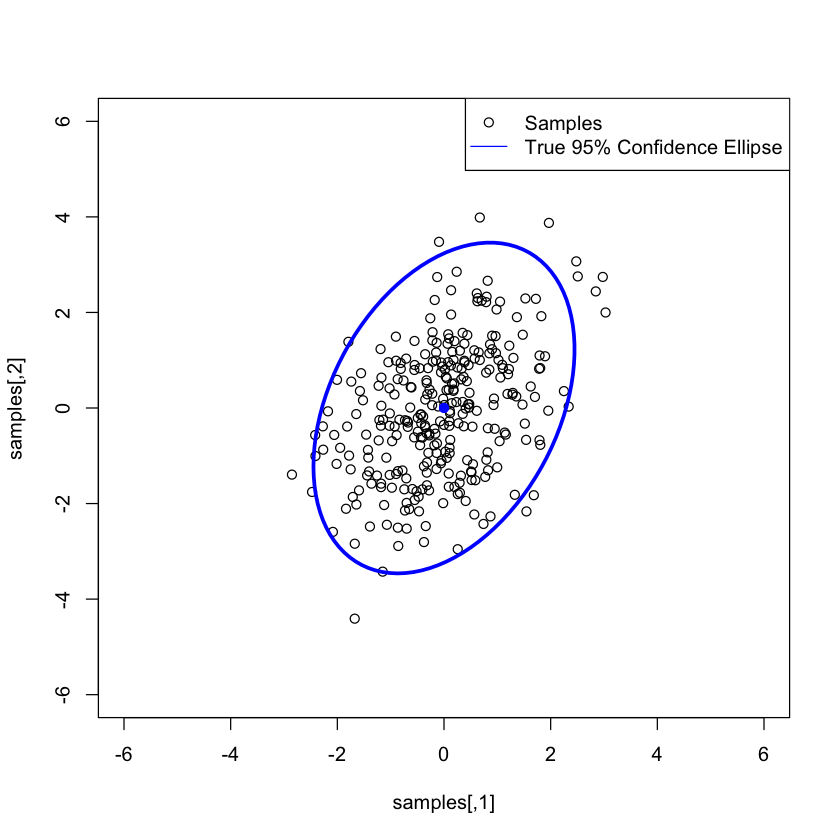

In [4]:
true_mu <- c(0,0)
true_sig <- matrix(c(1,0.5,0.5,2),nrow = 2)
samples <- rmvnorm(300, true_mu, true_sig)
par(bg = 'white')
plot(samples, xlim = c(-6,6), ylim = c(-6, 6))

ellipse_data <- ellipse(true_sig, centre = true_mu, level = 0.95)
lines(ellipse_data, type = 'l', main = "95% Confidence Interval Ellipse", col="blue", lwd=3)
points(true_mu[1], true_mu[2], pch = 19, col = "blue")

legend("topright", legend = c("Samples", "True 95% Confidence Ellipse"), pch = c(1, NA), lty = c(NA, 1), col = c("black", "blue"))





#### Task (2)
Implement the maximum likelihood estimation for the mean and variance given the samples for the multivariate case.

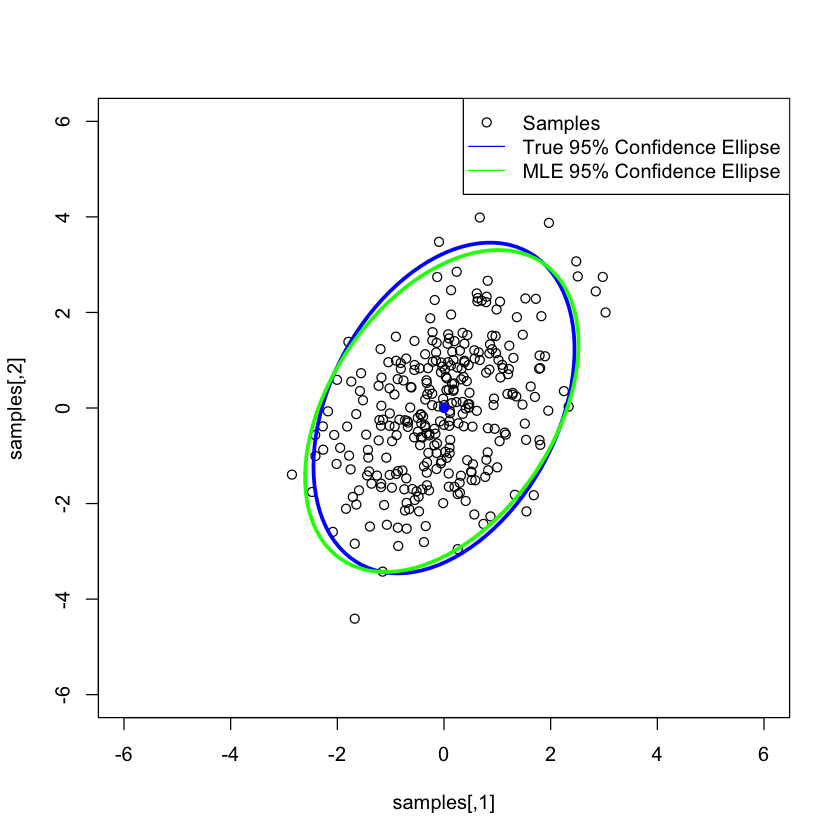

In [5]:
mu <-  # todo
sig <-  # todo

par(bg = 'white')
plot(samples, xlim = c(-6,6), ylim = c(-6, 6))

ellipse_data <- ellipse(true_sig, centre = true_mu, level = 0.95)
lines(ellipse_data, type = 'l', col="blue", lwd=3)
ellipse_data <- ellipse(sig, centre = mu, level = 0.95)
lines(ellipse_data, type = 'l', col="green", lwd=3)
points(true_mu[1], true_mu[2], pch = 19, col = "blue")

legend("topright", legend = c("Samples", "True 95% Confidence Ellipse", "MLE 95% Confidence Ellipse"), pch = c(1, NA, NA), lty = c(NA, 1, 1), col = c("black", "blue", "green"))




# Expectation Maximization

Now, we are given a data set $D=\mathbb{[x]}_{t=1}^T$ again. However, our data looks different. Visually you can see different modes in the data. We assume that our data consists of a mixuture of distributions. We want to know the components of this mixture . Also, we want to know, given a single data point, what is the most likely responsible component for this data point, i.e., which data point belongs to which component with their respective probability. Let the component denoted by $K$ and the data by $X$. We have this graphical model:


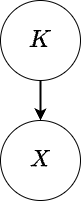

#### How do we sample from this model?
Suppose, $K$ follows categorical distribution and $X$ follows a normal distribution. Assume we have 3 processes with each of them emitting data points $x_t\mid k$ which are normally distributed depending on the specific process $k$. The components and their respectiv observations have the following parametrization:

$\begin{align}
k &\sim \text{Cat}(0.2, \, 0.3, \, 0.5) \\
x \, \mid \, k=1 &\sim \mathcal{N}(\begin{bmatrix} 6 \\ 6\end{bmatrix}, \, \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}) \\
x \, \mid \, k=2 &\sim \mathcal{N}(\begin{bmatrix} 0 \\ -6\end{bmatrix}, \, \begin{bmatrix} 2 & 1 \\ 1 & 2\end{bmatrix}) \\
x \, \mid \, k=3 &\sim \mathcal{N}(\begin{bmatrix} -6 \\ 0\end{bmatrix}, \, \begin{bmatrix} 1 & 0.5 \\ 0.5 & 2\end{bmatrix}) \\
\end{align}$

Sampling $x$'s by first sampling a process/component $k$. Then given the $k$ we can select the normal distribution and sample the $x$ respectively.



#### Task (3)
Implement the sampling Process. Sample first from a Categorical using the pcomp probabilities. Then, given the Ksample, sample from the respective multivariate normal distributions with given parameters means and covs.

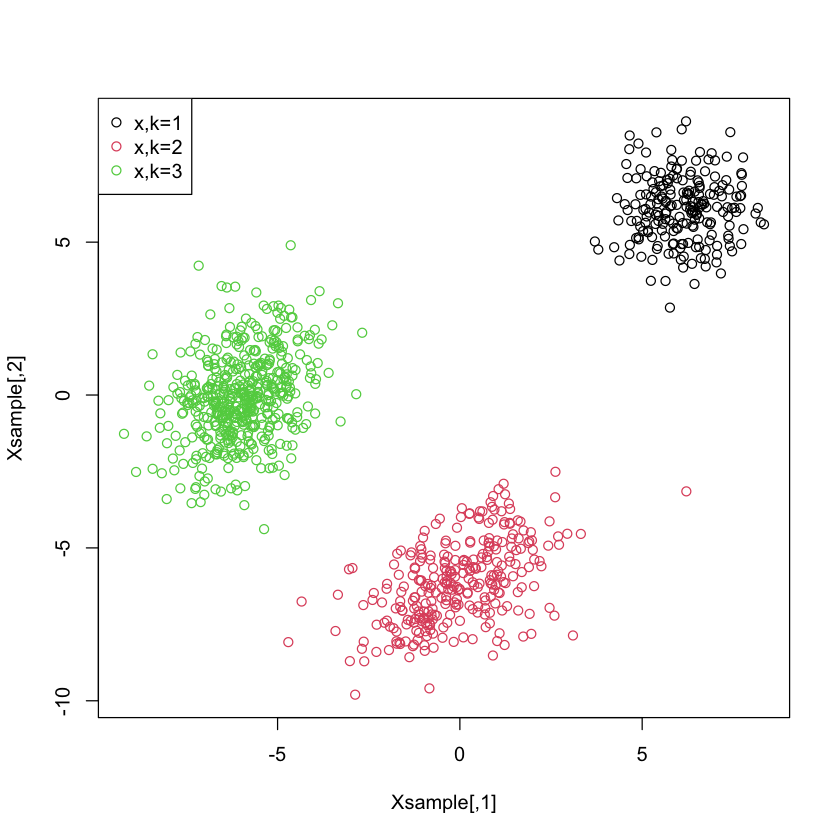

In [6]:
Nsample <- 1000
Ncomp <- 3

pcomp <- c(0.2,0.3,0.5)
means <- list(c(6,6),c(0,-6),c(-6,0))
covs <- list(matrix(c(1,0,0,1),nrow=2),
             matrix(c(2,1,1,2),nrow=2),
             matrix(c(1,0.5,0.5,2),nrow=2))

Ksample <- # todo
Xsample <- # todo

par(bg = 'white')
plot(Xsample,col=Ksample)
legend("topleft", legend = c("x,k=1", "x,k=2", "x,k=3"), pch = c(1, 1, 1), col = c(1, 2, 3))



#### However, we only observe the $x$ not the $k$

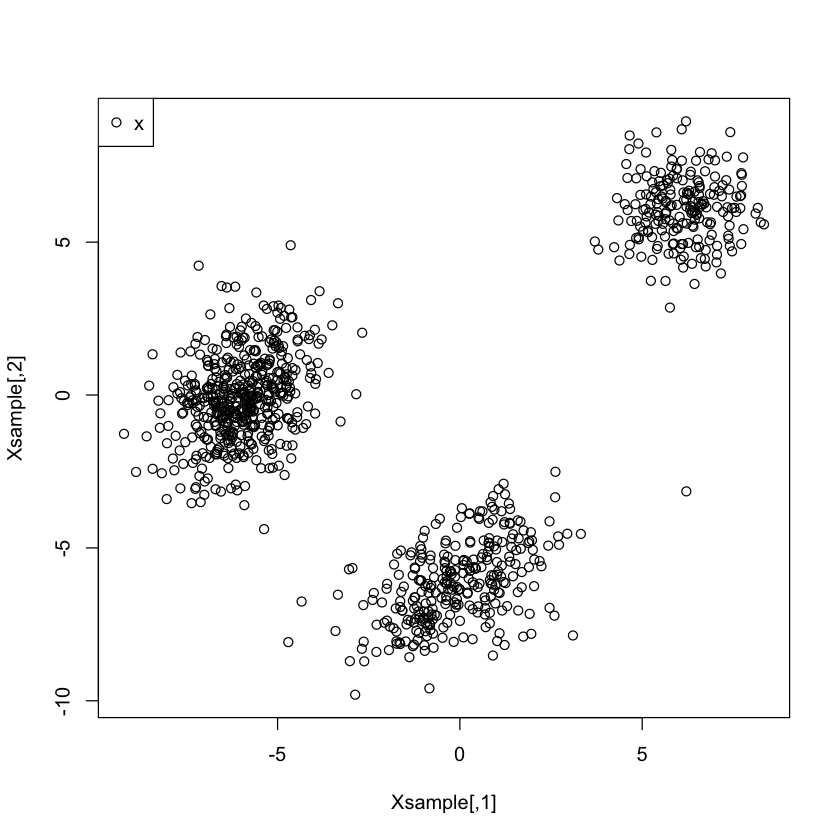

In [7]:
par(bg = 'white')
plot(Xsample)
legend("topleft", legend = c("x"), pch = c(1), col = c(1))

#### Estimating the parameters of the mixture components

Since we only oberserve x, if we would try maximimum likelihood estimation:

$l(\theta; x_{1:T}) = \text{log} \, p(x_{1:T}; \theta) = \text{log} \, \sum_{k_{1:T}} p(x_{1:t},k_{1:T})$ 


... and log-sum is not fun ...

#### Expectation Maximization

The expectation maximization algorithm is an iterative procedure that allows, given a current parameter estimate $\theta^{(s)}$, to compute an improved parameter estimate $\theta^{(s+1)}$. It is based on using the expected likelihood, given by taking the expectation of the joint log likelihood with respect to the hidden/process variable $K$. This
expectation is given by:

$\begin{align} \mathcal{Q}(\theta; \, \theta^{(s)}) &= \mathbb{E}_{k \mid x; \theta^{(s)}}(l(\theta; k,x)) \\
&= \int_k l(\theta; k, x) \, p(k \mid x; \theta^{(s)}) \ dk \\
\theta^{(s+1)} &= arg \, max_\theta \mathcal{Q}(\theta; \, \theta^{(s)})\end{align}$

Showing that we can optimize every factor invidually:

$\begin{align}
l(\theta, k, x) &= \text{log} \,  p(k_{1:T}, x_{1:T}) \\
&= \text{log} \, \prod_{t=1}^{T} p(k_t, x_t) \\
&= \sum_{t=1}^T \text{log} \, p(k_t, x_t) \\
&= \sum_{t=1}^T \text{log}(p(x_t \mid k_t) p(k_t)) \\
&= \sum_{t=1}^T \text{log} \, p(x_t \mid k_t)+ \sum_{t=1}^T \text{log} \, p(k_t) \\
\mathcal{Q}(\theta; \, \theta^{(s)}) &= \mathbb{E}_{k \mid x; \theta^{(s)}}(l(\theta; k,x)) \\
&= \mathbb{E}_{k \mid x; \theta^{(s)}}(\sum_{t=1}^T \text{log} \, p(x_t \mid k_t)+ \sum_{t=1}^T \text{log} \, p(k_t)) \\
&= \sum_{t=1}^T \mathbb{E}_{k \mid x; \theta^{(s)}}(\text{log} \, p(x_t \mid k_t)) +  \sum_{t=1}^T \mathbb{E}_{k \mid x; \theta^{(s)}}(\text{log} \, p(k_t))
\end{align}$

Let $\lambda$ be the mixture weight, $p(K=k) = \lambda_k$ with $\sum_{k=1}^{K}\lambda_k$ = 1. 

$\theta_k \in (\mu_k, \Sigma_k, \lambda_k)$

Improved parameters are then givin by maximizing:

$\begin{align}
\mu^{(s+1)}, \Sigma^{(s+1)} &= arg \, max_{\mu, \Sigma} \sum_{t=1}^T \mathbb{E}_{k \mid x; \theta^{(s)}}(\text{log} \, p(x_t \mid k_t; \, \mu, \, \Sigma)) \\
\lambda^{(s+1)} &=  arg \, max_{\lambda} \sum_{t=1}^T \mathbb{E}_{k \mid x; \theta^{(s)}}(\text{log} \, p(k_t; \, \lambda_k)) \end{align}$


Now we can derive Update rules for those parameters, by solving:

$\begin{align}
0 &= (\frac{\partial}{\partial \mu}, \frac{\partial}{\partial \Sigma}) \sum_{t=1}^T \mathbb{E}_{k_t \mid x_{1:T}; \theta^{(s)}}(\text{log} \, p(x_t \mid k_t; \, \mu, \, \Sigma)) \\ 
0 &= \frac{\partial}{\partial \lambda} \sum_{t=1}^T \mathbb{E}_{k_{t} \mid x_{1:T}; \theta^{(s)}}(\text{log} \, p(k_t; \, \lambda_k))
\end{align}$

Solving those, yield the following update rules:

$\begin{align}
\tilde{p}_i^{(t)} &= \mathcal{N}(x_t \mid \mu_i^{(s)}, \, \Sigma_i^{(s)}) \cdot \lambda_i^{(s)} \\
c_t &= \sum_{i=1}^{K} \tilde{p}_i^{(t)} \\
p_i^{(t)} &= \frac{\tilde{p}_i^{(t)}}{c_t} \\
p_i &= \sum_{t=1}^{T} p_i^{(t)}  \\ 
\mu_i^{(s+1)} &= \frac{\sum_{t=1}^{T} p_i^{(t)} x_t}{p_i} \\
\Sigma_i^{(s+1)} &= \frac{1}{p_i} \sum_{t=1}^T p_i^{(t)} (x_t - \mu_i^{(s+1)})(x_t - \mu_i^{(s+1)})^T \\
\lambda_i^{(s+1)} &= \frac{p_i}{\sum_{i=1}^K p_i}
\end{align}$






#### Task (4)
Implement the E-step and M-step. Use the before shown update rules. Note that in the equations, $i$ denotes the component. So every calculation has to be done for each component repectively. ll is the marginal log-likelihood and is obtainible by calculating $ ll = \sum_{i=1}^K \text{log}(c_t)$.

In [8]:
e_step <- function(x, mus, sigs, lambdas) {
   pit_ <- # todo
   ct <- # todo
   pit <- # todo
   pi <- # todo
   ll <- # todo
   
   list("pit" = pit, "pi" = pi, "ll" = ll)
}

m_step <- function(x, pit, pi) {
   mus <- #todo
   sigs <- # todo
   lambdas <- #todo
   list("mus" = mus, "sigs" = sigs, "lambdas" = lambdas)
}

In [9]:
musss <- list()
sigsss <- list()
lambdasss <- list()
llss <- list()

# do n exmax runs
for (run in 1:100) {
    # start parameters for the run
    # take a sample point for each component as starting point
    muss <- list(Xsample[sample(1:Nsample, Ncomp), ])
    # take for every component the same starting variance 
    sigss <- list(replicate(Ncomp, matrix(c(1, 0.1, 0.1, 1), nrow=2), simplify = FALSE))
    # uniform mixture weights as start
    lambdass <- list(rep(1/Ncomp, Ncomp))

    lls <- list()

    # maximum iterations
    for (i in 1:100) {    
        # expectation step
        e <- e_step(Xsample, muss[[i]], sigss[[i]], lambdass[[i]])
        # sometimes the calculation can be instable, when a components is assigned with a weight close to 0
        if (is.na(e$ll)) break
        lls[[i]] = e$ll
        # stop when the log-likelihood does not improve more than the threshhold
        if (i > 2) {
            if (abs((lls[[i]] - lls[[i-1]])) < 1) break
        }
        # maximization step
        m <- m_step(Xsample, e$pit, e$pi)
        muss[[i+1]] = m$mus
        sigss[[i+1]] = m$sigs
        lambdass[[i+1]] = m$lambdas
    }
    musss[[run]] <- muss
    sigsss[[run]] <- sigss
    lambdasss[[run]] <- lambdass
    llss[[run]] <- lls
}



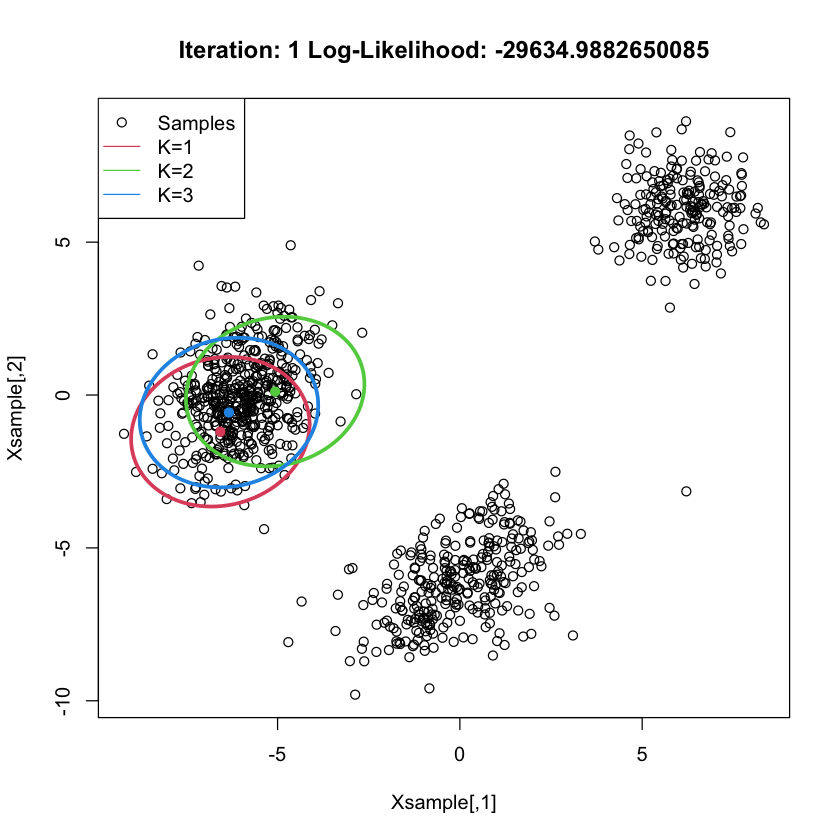

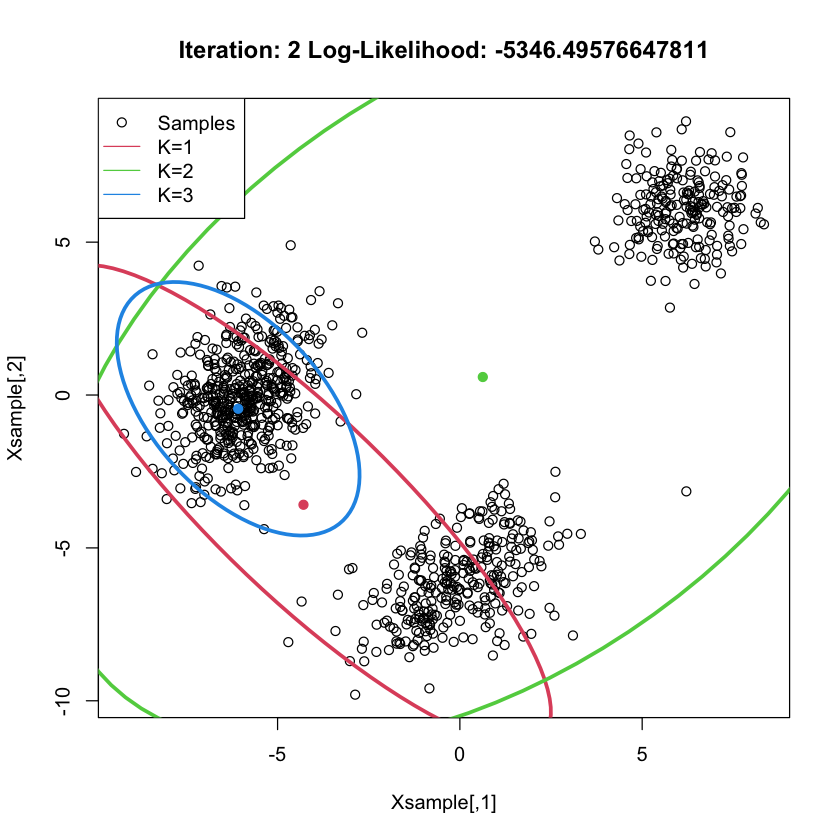

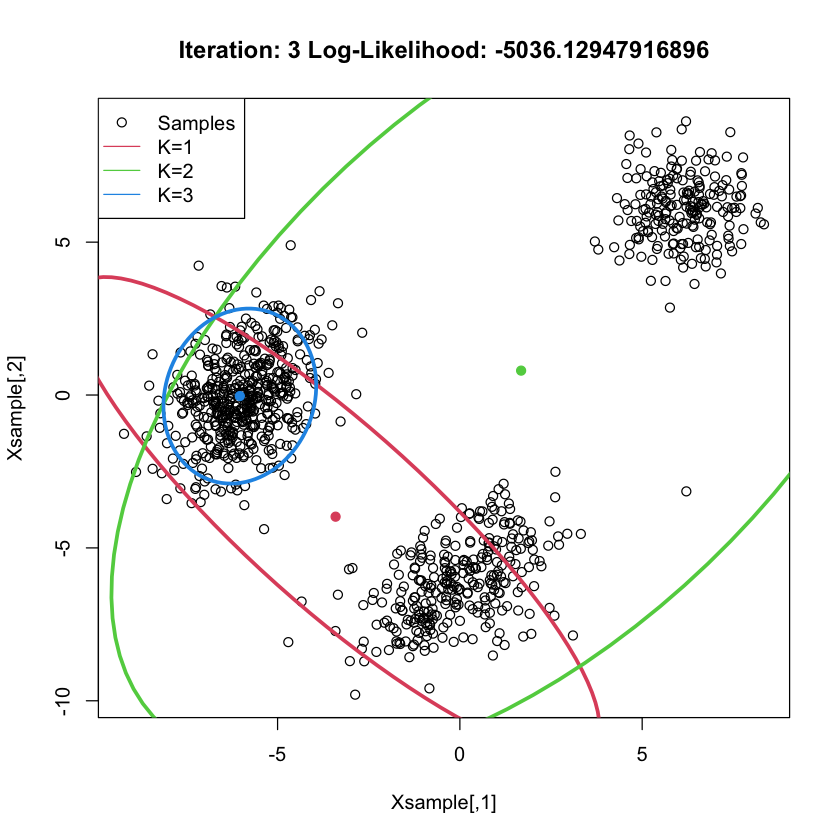

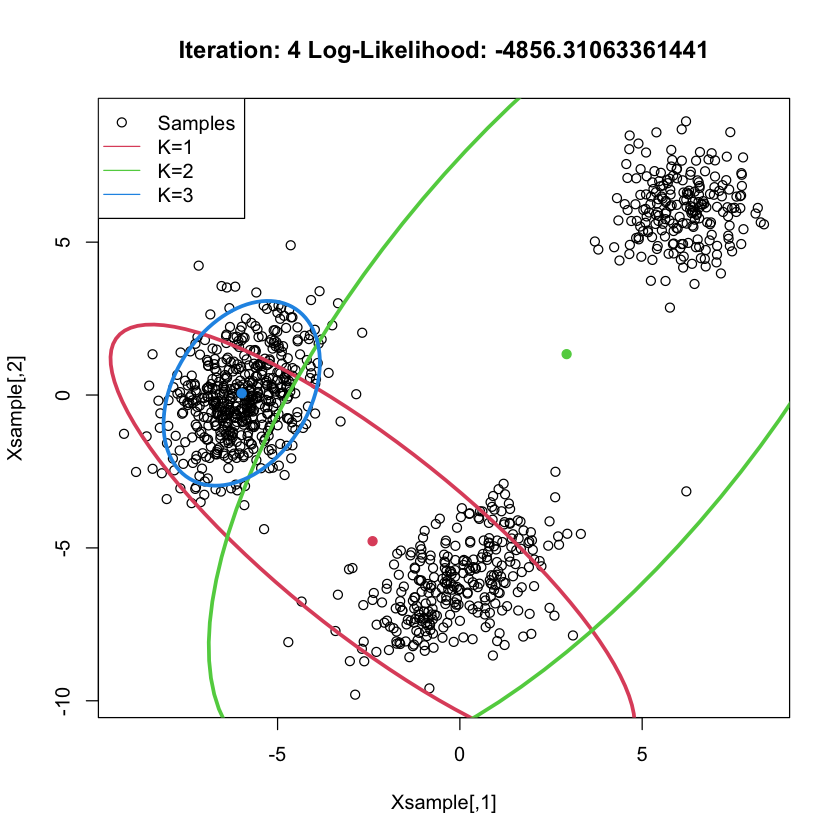

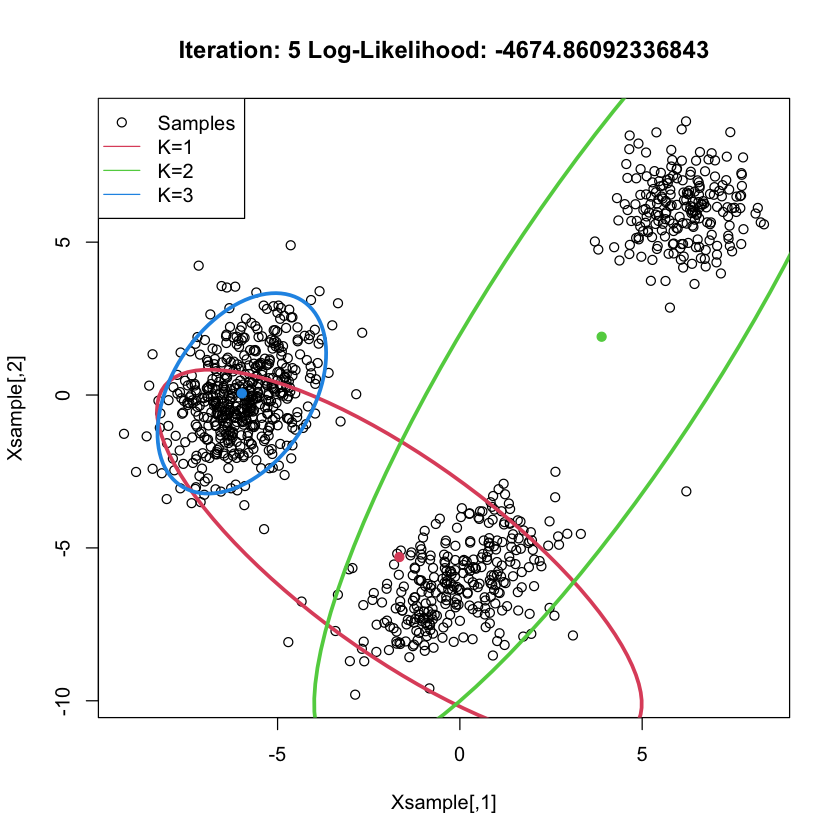

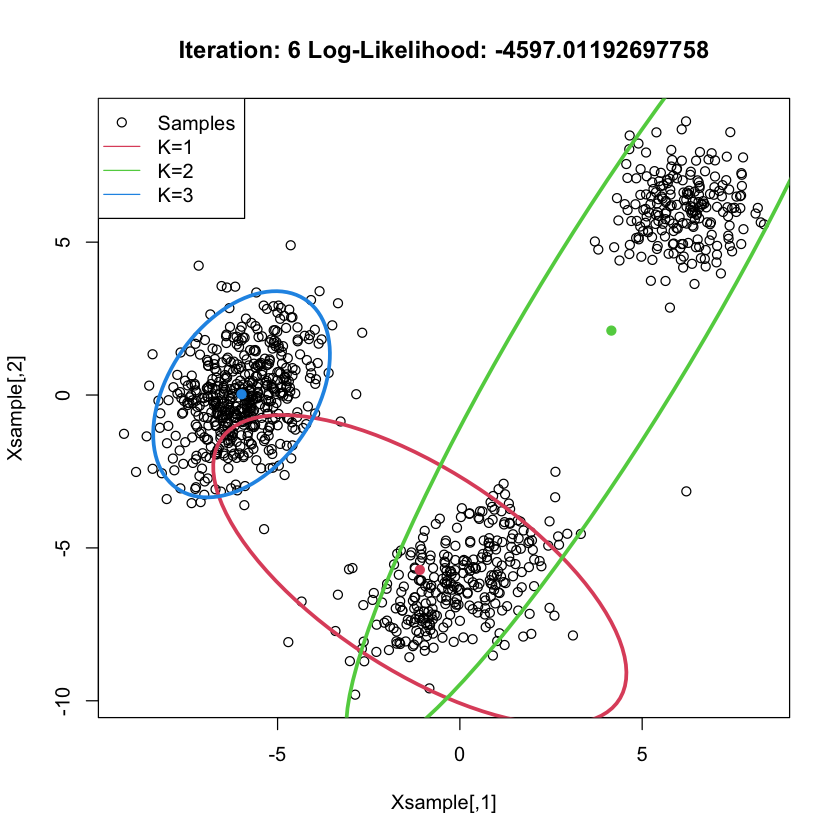

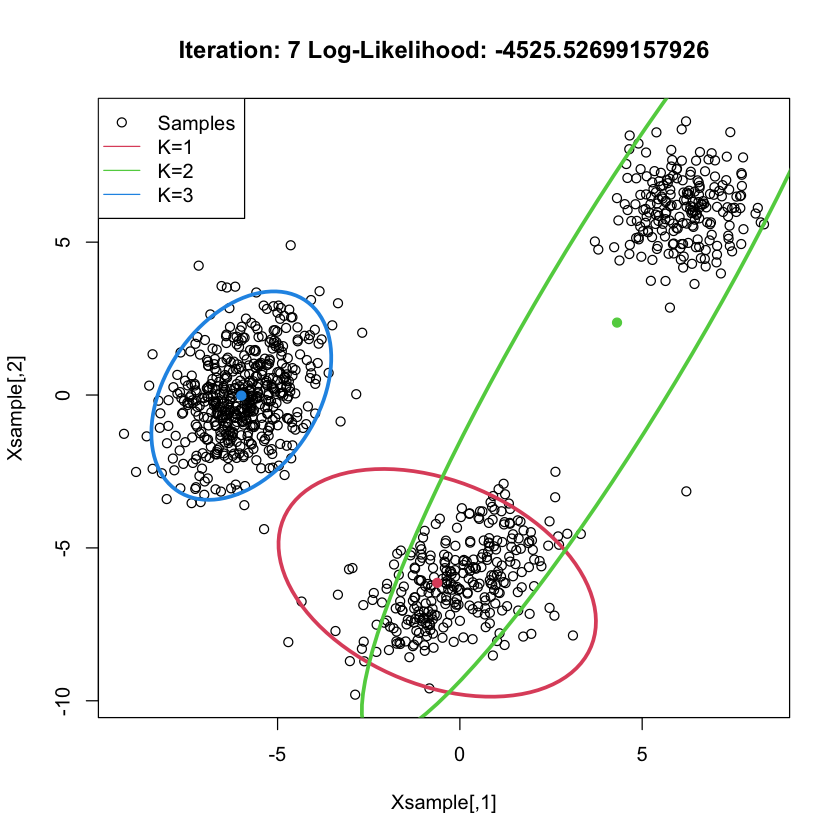

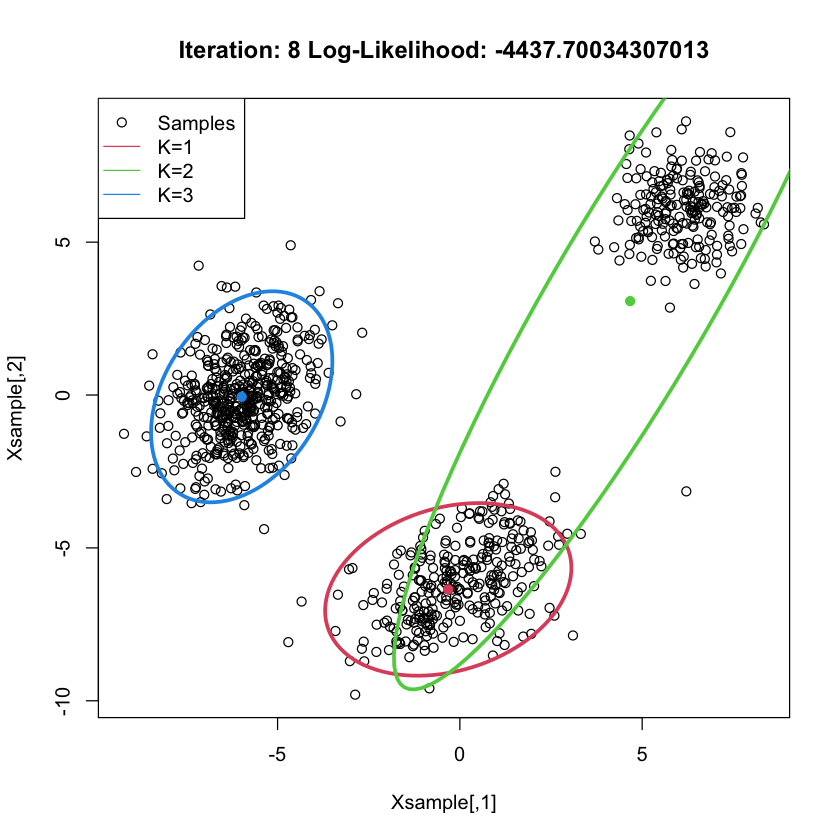

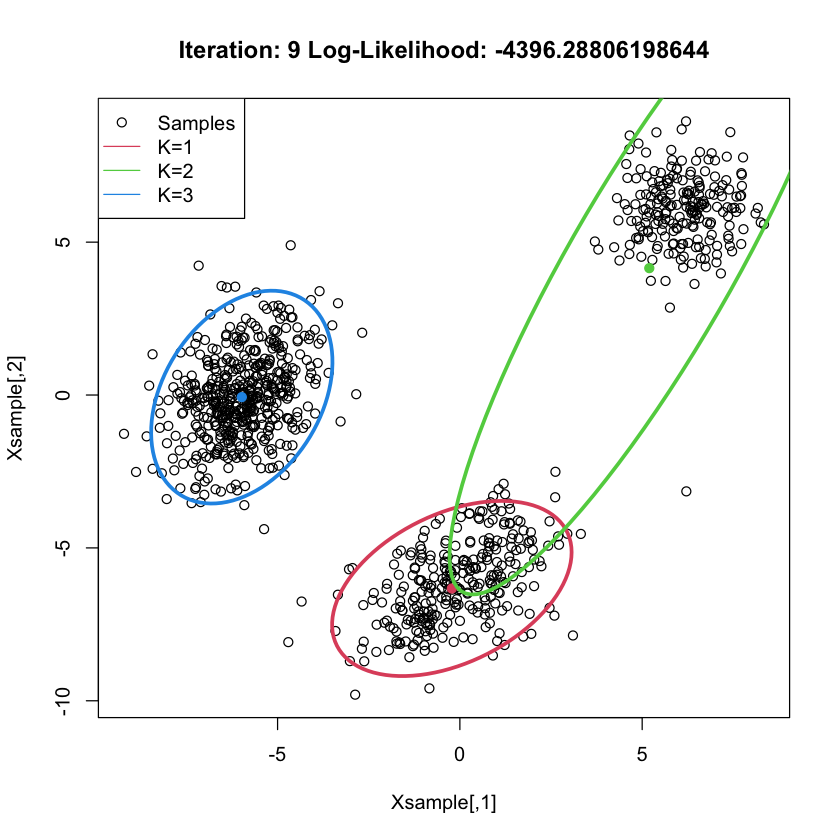

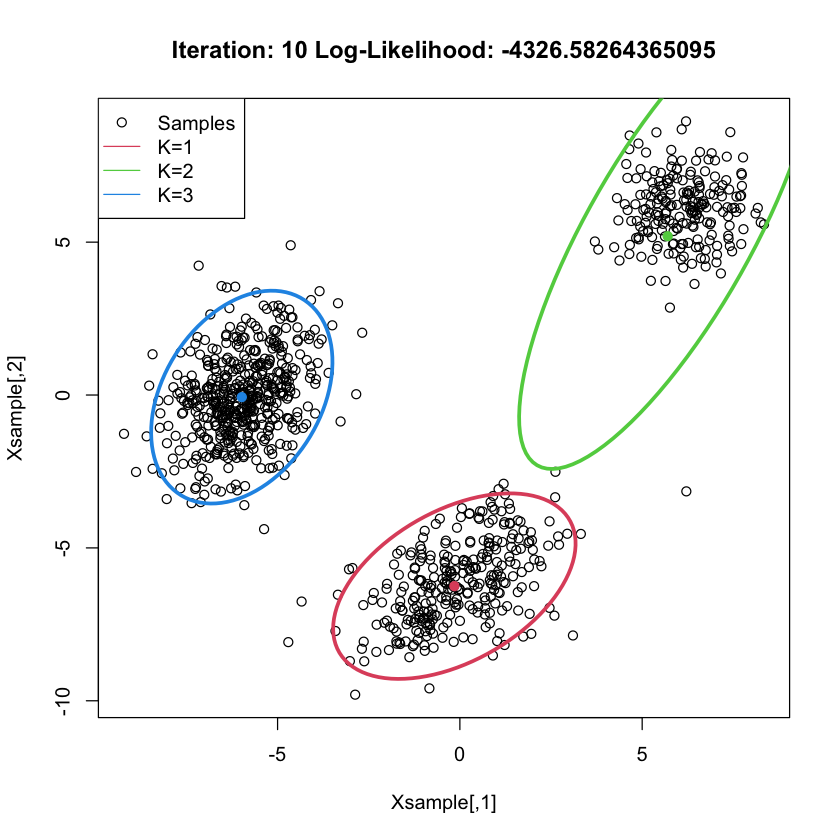

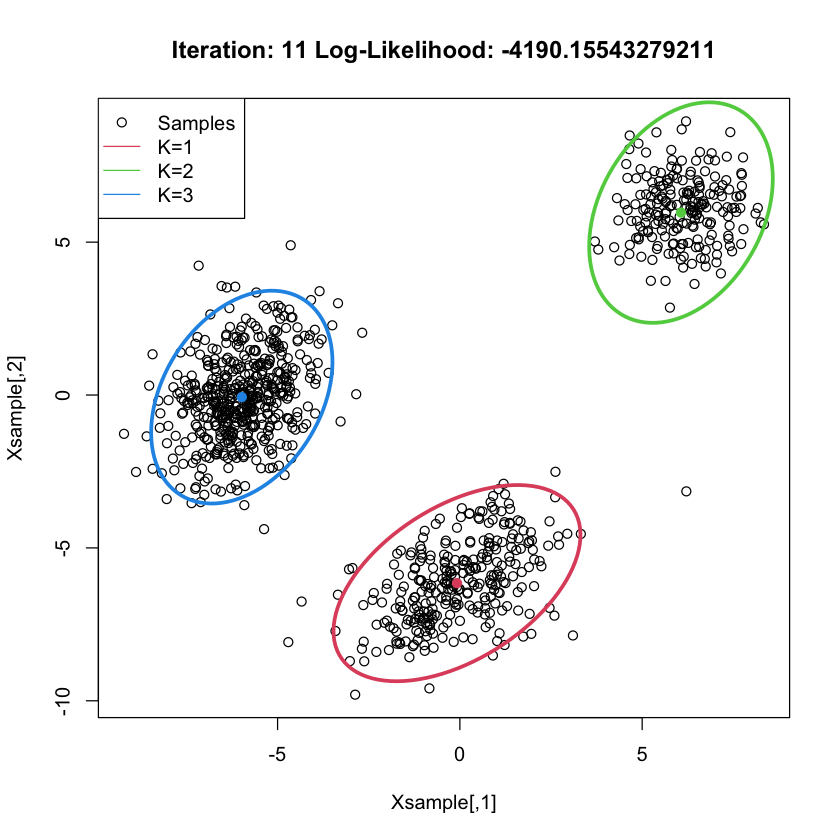

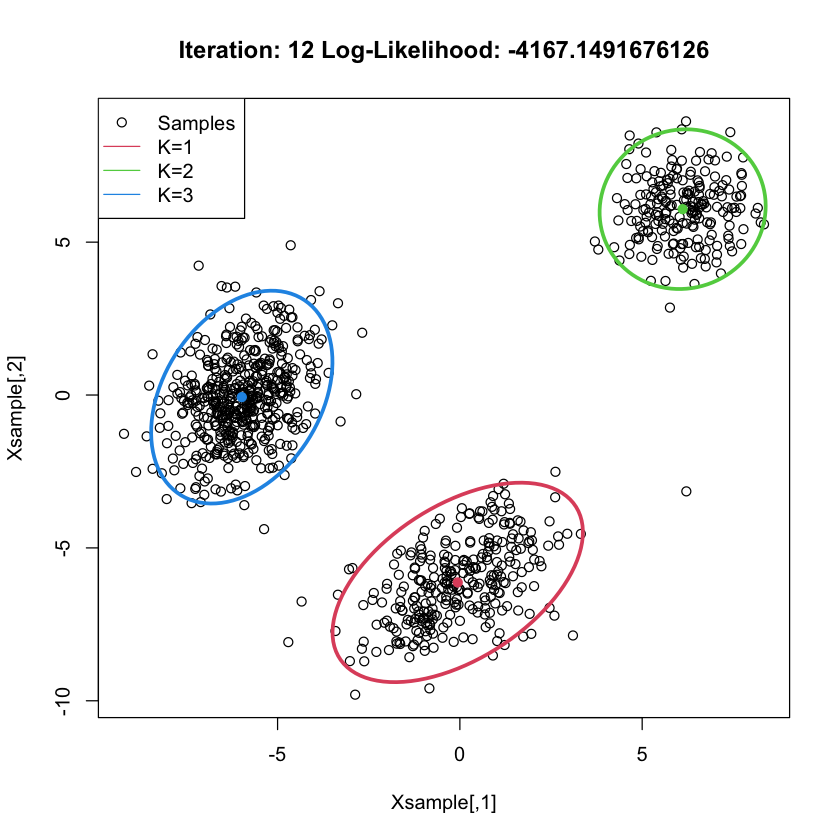

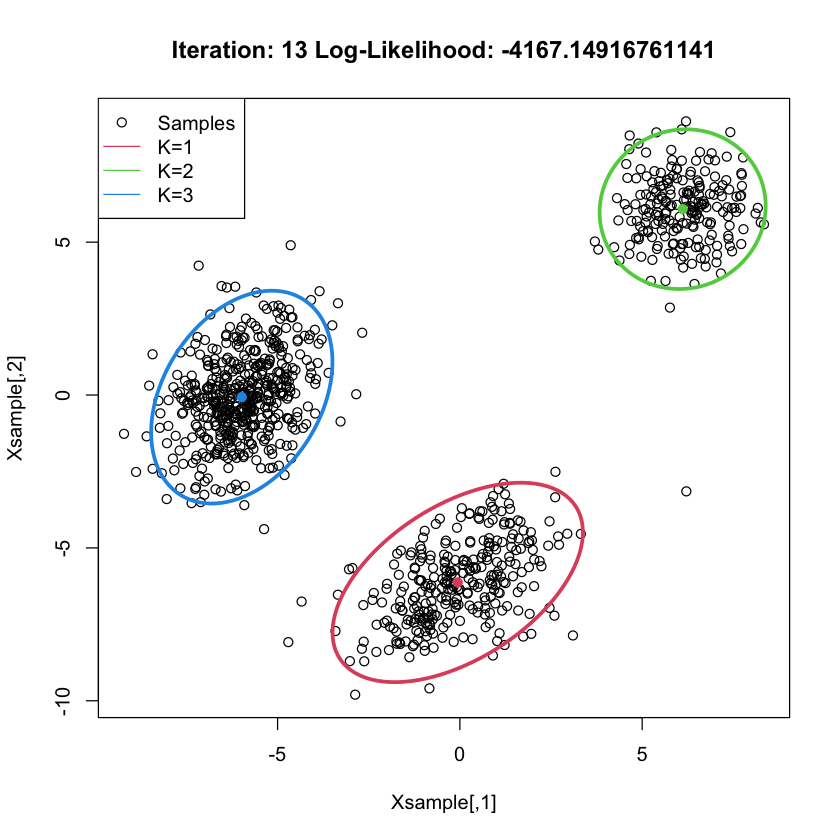

In [10]:
best_run = which.max(sapply(llss, \(lls) max(do.call(rbind, lls))))
for (i in 1:length(llss[[best_run]])) {
    par(bg = 'white')
    plot(Xsample)

    for (k in 1:Ncomp){
        ellipse_data <- ellipse(sigsss[[best_run]][[i]][[k]], centre = musss[[best_run]][[i]][k,], level = 0.95)
        lines(ellipse_data, type = 'l', col=k+1, lwd=3)
        points(musss[[best_run]][[i]][k,1], musss[[best_run]][[i]][k,2], pch = 19, col = k+1)
    }   
    title(paste("Iteration:", i, "Log-Likelihood:", llss[[best_run]][[i]]))
    legend("topleft", legend = c("Samples", "K=1", "K=2", "K=3"), pch = c(1, NA, NA, NA), lty = c(NA, 1, 1, 1), col = c("black", 2, 3, 4))

}

